# RMS (Compute root-mean-square)
* rms([y, S, frame_length, hop_length, …])
* librosa.feature.rms(y=None, S=None, frame_length=2048, hop_length=512, center=True, pad_mode='reflect')
* STFT 계산을 하지 않기 때문에 빠르다. 하지만 spectogram 이 있다면 spectogram으로 분석하는 게 시간이 더 오래걸리지만 더 정확하다.

    < y를 입력하거나 S를 입력해야 한다. >   
    y : np.ndarray [shape=(n,)] or None | 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것    
    S : np.ndarray [shape=(d, t)] or None | spectrogram 진폭    
    frame_length : int > 0 [scalar] | 프레임 길이    
    hop_length : int > 0 [scalar] | STFT 컬럼 간의 간격    
    center : bool | True라고 쓰고 y가 입력되어 있다면 frame_length//2 을 신호로 패딩한다. S가 들어간다면 안 넣어도 됨    
    pad_mode : str | numpy.pad에 들어갈 수 있는 기능들을 쓸 수 있다. (‘constant’ , 'edge’, ‘linear_ramp’, ‘maximum’, ‘mean’ , ‘median’ , ‘minimum’ , ‘reflect’ , ‘symmetric’ , ‘wrap’ , ‘empty’    

In [2]:
# 주형's voice
import librosa
y, sr = librosa.load('../../nmb_data/teamvoice/testvoice_M2.wav')

----------------------

# 디폴트

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

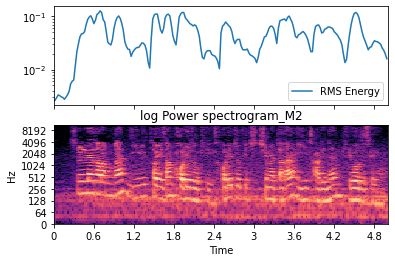

In [4]:
# 디폴트 값

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram_M2')

plt.show()

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

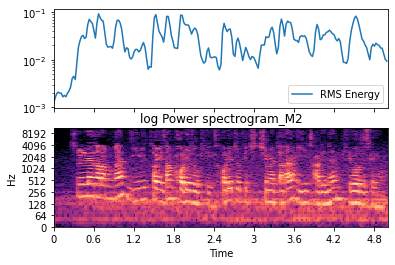

In [6]:
# 디폴트 값

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms2.shape)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms2)
ax[0].semilogy(times, rms2[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram_M2')

plt.show()

# hop_length

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 862)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

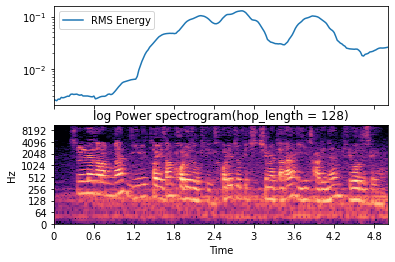

In [8]:
# hop_length = 128

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, hop_length = 128)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(hop_length = 128)')

plt.show()

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 108)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

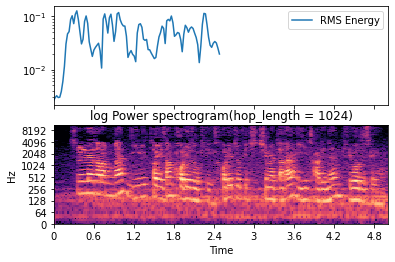

In [9]:
# hop_length = 1024

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, hop_length = 1024)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(hop_length = 1024)')

plt.show()

# n_fft

    rms에서는 n_fft를 사용하지 않는다.
    TypeError: rms() got an unexpected keyword argument 'n_fft'

-------------------

# 그 외 파라미터 튜닝

# frame_length

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

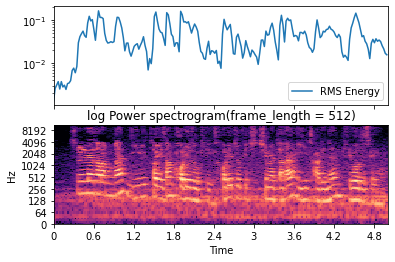

In [10]:
# frame_length = 512

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, frame_length=512)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(frame_length = 512)')

plt.show()

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

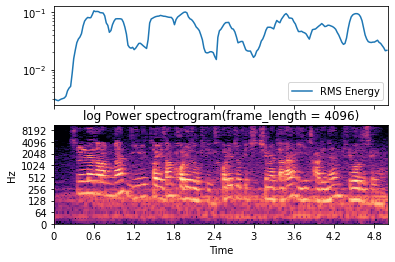

In [11]:
# frame_length = 4096

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, frame_length=4096)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(frame_length = 4096)')

plt.show()

# center

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 212)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

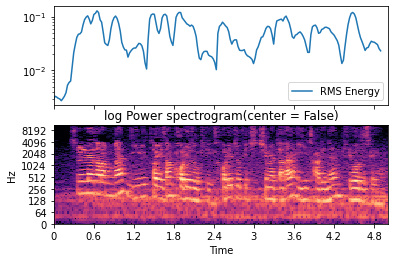

In [13]:
# center = False

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, center = False)
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(center = False)')

plt.show()

# pad_mode

y :  [-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205]
sr :  22050
y길이 :  110250
Sampling rate (KHz) : 22050
Audio length (seconds) : 5.00
rms.shape :  (1, 216)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

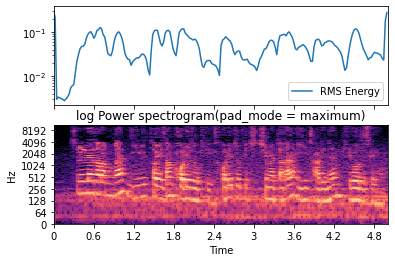

In [14]:
# pad_mode = maximum

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, pad_mode = 'maximum')
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(pad_mode = maximum)')

plt.show()

C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\feature\spectral.py:930: RuntimeWarning: overflow encountered in square
  power = np.mean(np.abs(x) ** 2, axis=0, keepdims=True)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nammr\Anaconda3\envs\pj21\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped 

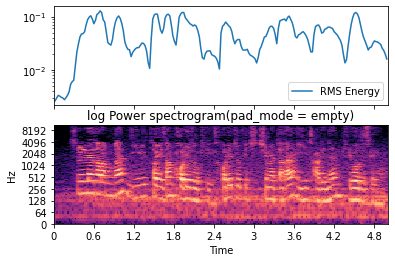

In [15]:
# pad_mode = empty

# [1] y : audio time series.
rms1 = librosa.feature.rms(y=y, pad_mode = 'empty')
print("y : ", y)
print("sr : ", sr)
print("y길이 : ", len(y))
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr)) 
print("rms.shape : ", rms1.shape)

# [2] S : spectrogram magnitude
S, phase = librosa.magphase(librosa.stft(y))
rms2 = librosa.feature.rms(S=S)

# Graph
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# plt.figure(figsize=(100, 16))
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')   # log scale
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram(pad_mode = empty)')

plt.show()